<a href="https://colab.research.google.com/github/maria128128/movie-recommend-project/blob/main/Mall_customer_analysis_using_DBSCAN_clustering_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
corr_mat= df.corr()
corr_mat

<ipython-input-6-563b8029bfc3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat= df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


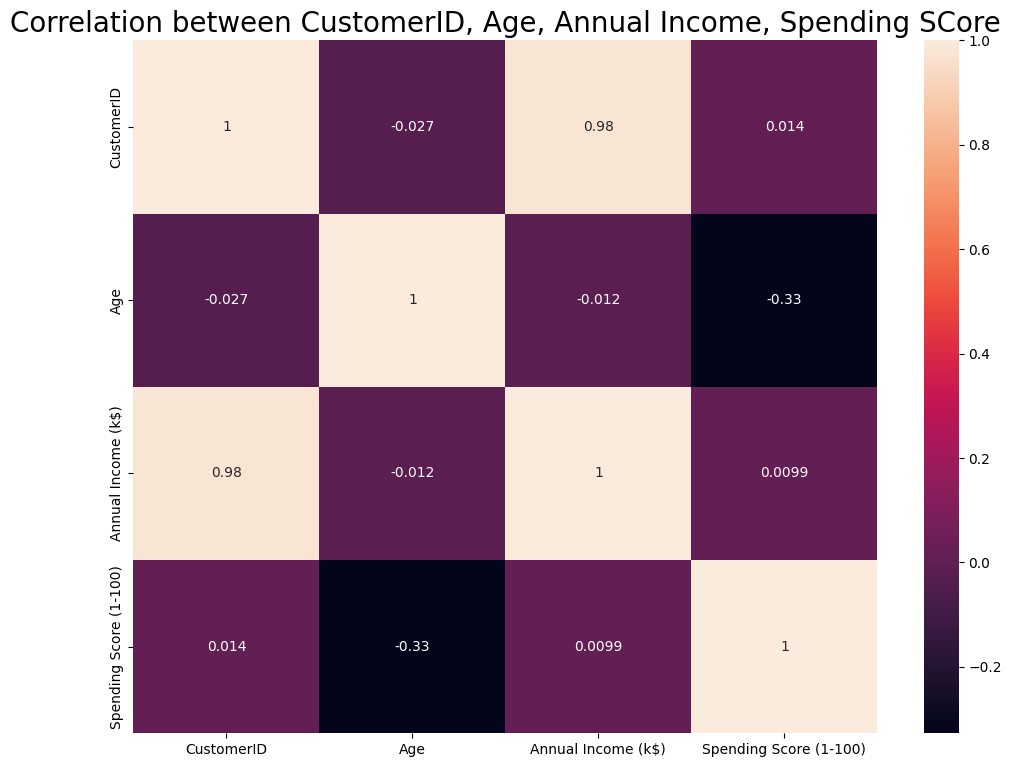

In [ ]:
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation between CustomerID, Age, Annual Income, Spending SCore', fontsize=20)
plt.show()

In [ ]:
df= df.drop(['CustomerID'],axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df= pd.get_dummies(df, columns=['Gender'])
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

In [ ]:
DBS_clustering= DBSCAN(eps=12.5, min_samples=4).fit(df)

DBSCAN_clustered = df.copy()
DBSCAN_clustered.loc[:, 'cluster']=DBS_clustering.labels_

In [ ]:
DBSCAN_clust_sizes= DBSCAN_clustered.groupby('cluster').size().to_frame()
DBSCAN_clust_sizes.columns=['DBSCAN_size']
DBSCAN_clust_sizes


,DBSCAN_size
cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


Text(0.5, 1.0, 'How annual income corresponds to the spending rate')

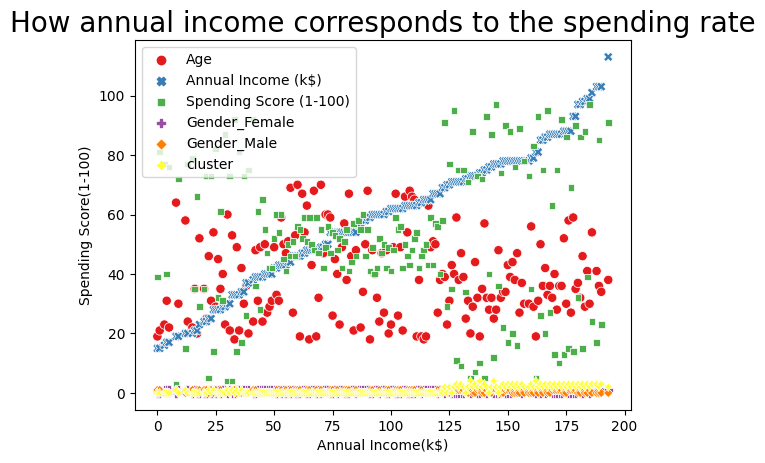

In [ ]:
import seaborn as sns
#Defining the Outliers
outliers= DBSCAN_clustered[DBSCAN_clustered['cluster']==-1]
ax= sns.scatterplot(data=DBSCAN_clustered[DBSCAN_clustered['cluster']!=-1],
                  palette='Set1',legend='full',s=45)

ax.set_xlabel('Annual Income(k$)', fontsize=10)
ax.set_ylabel('Spending Score(1-100)', fontsize=10)
ax.set_title('How annual income corresponds to the spending rate', fontsize=20)

In [ ]:
!pip install fuzzy-c-means

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.0
    Uninstalling pydantic-2.2.0:
      Successfully uninstalled pydantic-2.2.0


In [ ]:
!pip install -U-scikit_fuzzy


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --


In [ ]:
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [ ]:
x= df.to_numpy()

In [ ]:
x

array([[ 19,  15,  39,   0,   1],
       [ 21,  15,  81,   0,   1],
       [ 20,  16,   6,   1,   0],
       [ 23,  16,  77,   1,   0],
       [ 31,  17,  40,   1,   0],
       [ 22,  17,  76,   1,   0],
       [ 35,  18,   6,   1,   0],
       [ 23,  18,  94,   1,   0],
       [ 64,  19,   3,   0,   1],
       [ 30,  19,  72,   1,   0],
       [ 67,  19,  14,   0,   1],
       [ 35,  19,  99,   1,   0],
       [ 58,  20,  15,   1,   0],
       [ 24,  20,  77,   1,   0],
       [ 37,  20,  13,   0,   1],
       [ 22,  20,  79,   0,   1],
       [ 35,  21,  35,   1,   0],
       [ 20,  21,  66,   0,   1],
       [ 52,  23,  29,   0,   1],
       [ 35,  23,  98,   1,   0],
       [ 35,  24,  35,   0,   1],
       [ 25,  24,  73,   0,   1],
       [ 46,  25,   5,   1,   0],
       [ 31,  25,  73,   0,   1],
       [ 54,  28,  14,   1,   0],
       [ 29,  28,  82,   0,   1],
       [ 45,  28,  32,   1,   0],
       [ 35,  28,  61,   0,   1],
       [ 40,  29,  31,   1,   0],
       [ 23,  